In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import seaborn as sns
import ast


c:\Users\dplg4\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# ENTENDIMIENTO DE LOS DATOS

In [2]:
# Leer el archivo CSV con 950.000 datos
file_path = r'C:\Users\dplg4\OneDrive\Eafit- ciencia de datos\Semestre 2\Integrador\resultado_concatenado (1).csv'
df = pd.read_csv(file_path)

In [3]:
#Validación de nulos 
df.isnull().sum()

QuestionId                  0
AcceptedAnswerId            0
QuestionBody                0
QuestionTitle               0
QuestionTags                0
QuestionPostTypeId          0
QuestionOwnerUserId     20333
QuestionScore               0
AnswerId                    0
AnswerBody                  0
AnswerTitle            950000
AnswerTags             950000
AnswerPostTypeId            0
AnswerOwnerUserId           0
AnswerScore                 0
UserId                      0
Reputation                  0
UpVotes                     0
DownVotes                   0
Views                       0
dtype: int64

In [4]:
# Filtrar las filas donde QuestionTag sea igual a 0, esté vacío, sea igual a <> o contenga solo espacios
df = df[~df['QuestionTags'].isin(['0', '', '<>', ' '])]

In [5]:
#Realizar conteo de etiquetas únicas contenidas en el dataset

# Extraer todas las etiquetas como una lista de listas
tags_series = df['QuestionTags'].str.findall(r'<(.*?)>')

#Aplanar la lista de listas para obtener una sola lista de todas las etiquetas
all_tags = [tag for sublist in tags_series for tag in sublist]

# Convertir la lista de etiquetas en un conjunto para obtener solo las etiquetas únicas
unique_tags = set(all_tags)

# Contar el número de etiquetas únicas
number_of_unique_tags = len(unique_tags)

number_of_unique_tags

41494

In [6]:
#Visualizar variaciones de escritura para mismos temas 
sorted(unique_tags)

['.a',
 '.app',
 '.class-file',
 '.cod-file',
 '.d.ts',
 '.doc',
 '.env',
 '.git-folder',
 '.htaccess',
 '.htpasswd',
 '.lib',
 '.mov',
 '.net',
 '.net-1.0',
 '.net-1.1',
 '.net-2.0',
 '.net-3.0',
 '.net-3.5',
 '.net-4.0',
 '.net-4.0-beta-2',
 '.net-4.5',
 '.net-4.5.2',
 '.net-4.6',
 '.net-4.6.1',
 '.net-4.6.2',
 '.net-4.7',
 '.net-4.7.1',
 '.net-4.7.2',
 '.net-4.8',
 '.net-5',
 '.net-6.0',
 '.net-7.0',
 '.net-assembly',
 '.net-attributes',
 '.net-cf-3.5',
 '.net-client-profile',
 '.net-core',
 '.net-core-1.1',
 '.net-core-2.0',
 '.net-core-2.1',
 '.net-core-2.2',
 '.net-core-3.0',
 '.net-core-3.1',
 '.net-core-angular',
 '.net-core-authorization',
 '.net-core-configuration',
 '.net-core-logging',
 '.net-core-rc2',
 '.net-core-sdk',
 '.net-core-service-worker',
 '.net-fiddle',
 '.net-framework-version',
 '.net-gadgeteer',
 '.net-generic-math',
 '.net-interactive',
 '.net-mac',
 '.net-maui',
 '.net-maui.shell',
 '.net-micro-framework',
 '.net-native',
 '.net-reflector',
 '.net-remoting'

In [7]:
# Función para limpiar HTML
def limpiar_html(texto):
    soup = BeautifulSoup(texto, 'html.parser')
    return soup.get_text()

# Limpiar los campos asociados a títulos y cuerpos de preguntas y respuestas
df['QuestionBody'] = df['QuestionBody'].apply(limpiar_html)
df['AnswerBody'] = df['AnswerBody'].apply(limpiar_html)
df['QuestionTitle'] = df['QuestionTitle'].apply(limpiar_html)

In [8]:
#Convertir las etiquetas en una lista
df['QuestionTags'] = df['QuestionTags'].apply(lambda x: x.strip('<>').split('><'))
# Convertir todas las etiquetas de QuestionTags a minúsculas
df['QuestionTags'] = df['QuestionTags'].map(lambda tags: [tag.lower() for tag in tags])

count    950000.000000
mean       1253.237386
std        1634.824787
min          13.000000
25%         473.000000
50%         817.000000
75%        1436.000000
max       48649.000000
Name: BodyLength, dtype: float64


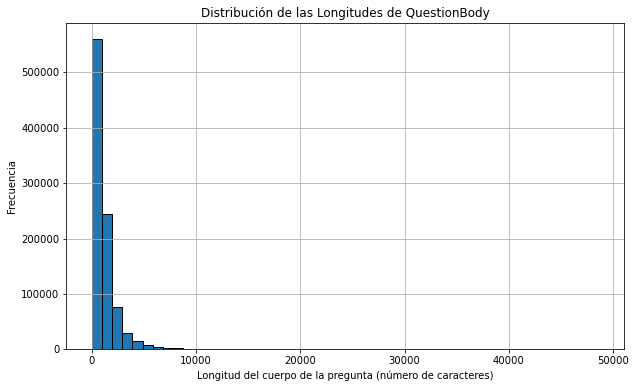

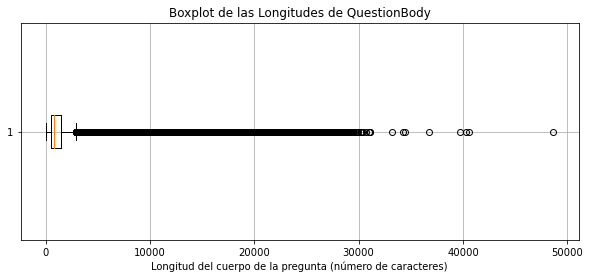

In [9]:
#Calcular la longitud de cada pregunta
df['BodyLength'] = df['QuestionBody'].apply(len)

# Estadísticas de las longitudes
print(df['BodyLength'].describe())

# Distribución con un histograma
plt.figure(figsize=(10, 6))
plt.hist(df['BodyLength'], bins=50, edgecolor='black')
plt.title('Distribución de las Longitudes de QuestionBody')
plt.xlabel('Longitud del cuerpo de la pregunta (número de caracteres)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Distribución con un boxplot para ver la dispersión
plt.figure(figsize=(10, 4))
plt.boxplot(df['BodyLength'], vert=False)
plt.title('Boxplot de las Longitudes de QuestionBody')
plt.xlabel('Longitud del cuerpo de la pregunta (número de caracteres)')
plt.grid(True)
plt.show()

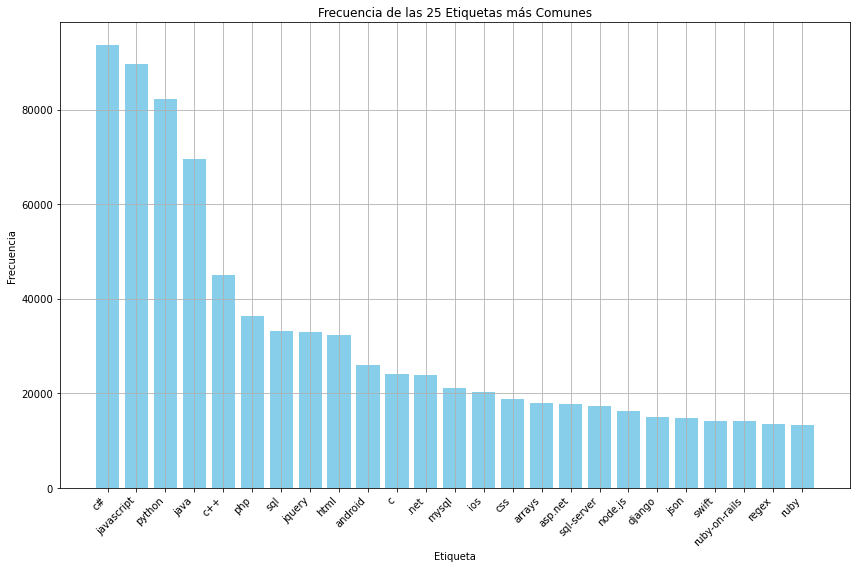

In [10]:
#Graficar las 25 etiquetas más comunes

# Contar la frecuencia de cada etiqueta
tag_counts = Counter(all_tags)

# Convertir el Counter a un DataFrame para facilitar el manejo
tags_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Frequency'])

# Ordenar el DataFrame por frecuencia en orden descendente
tags_df = tags_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Seleccionar las 25 etiquetas más comunes
top_tags = tags_df.head(25)

# Graficar
plt.figure(figsize=(12, 8))
plt.bar(top_tags['Tag'], top_tags['Frequency'], color='skyblue')
plt.title('Frecuencia de las 25 Etiquetas más Comunes')
plt.xlabel('Etiqueta')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

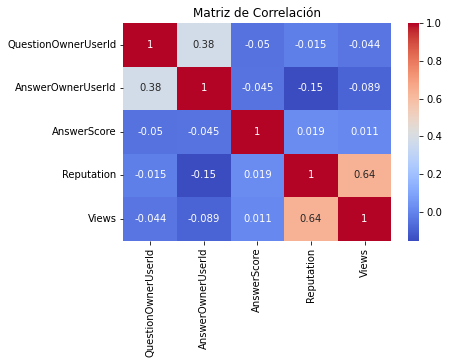

In [11]:
# Matriz de correlación con mapa de calor
correlation_matrix = df[['QuestionOwnerUserId', 'AnswerOwnerUserId',  'AnswerScore', 'Reputation', 'Views']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# PREPARACIÓN DE LOS DATOS

In [12]:
# Definir las listas de IDs y etiquetas que son criterios para el muestreo
top_languages = {"python","javascript", "js","java","c#", "csharp","c++", "cpp", "php","typescript", "ts","c","ruby","swift","objective-c", "objc",  "r", "kotlin", "go", "scala", "perl", "dart","lua", "haskell", "matlab", "visual-basic", "vb", "vb.net", "groovy","sql", "bash", "shell", "fortran", "powershell", "apex", "assembly", "asm", "elixir","f#", "fsharp","erlang","julia","d", "vba","delphi", "object-pascal", "pl/sql", "plsql", "cobol", "ada",  "prolog",  "sas",  "tcl",  "abap"}
unique_answer_owner_ids = df['AnswerOwnerUserId'].unique()
unique_question_tags = list(top_languages)

# Función para convertir cadenas de QuestionTags a listas de etiquetas
def convert_to_list(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

# Convertir QuestionTags a listas de etiquetas
df['QuestionTags'] = df['QuestionTags'].astype(str).apply(convert_to_list)

# Filtrar los registros que tienen al menos una etiqueta en unique_question_tags para el conjunto de entrenamiento
train_df = df[
    df['QuestionTags'].apply(lambda tags: any(tag in unique_question_tags for tag in tags))
]

# Filtrar los registros para obtener una muestra de 100,000 que privilegie a AnswerOwnerUserId con múltiples respuestas
train_sample_size = min(100000, len(train_df))
train_sampled_df = train_df.groupby('AnswerOwnerUserId', group_keys=False).apply(lambda x: x.sample(min(len(x), train_sample_size // len(unique_answer_owner_ids)), random_state=42))

# Si no se alcanza la muestra deseada, completar con el resto
if len(train_sampled_df) < train_sample_size:
    additional_samples_needed = train_sample_size - len(train_sampled_df)
    remaining_df = train_df[~train_df.index.isin(train_sampled_df.index)]
    train_sampled_df = pd.concat([train_sampled_df, remaining_df.sample(n=additional_samples_needed, random_state=42)])

# Guardar el DataFrame de entrenamiento
train_sampled_df.to_csv('train_data.csv', index=False)

# Obtener el conjunto de QuestionId de los datos de entrenamiento
train_question_ids = set(train_sampled_df['QuestionId'])

# Filtrar los registros que tienen AnswerOwnerUserId en la lista y contienen al menos una etiqueta de unique_question_tags para el conjunto de prueba
test_df = df[
    (df['AnswerOwnerUserId'].isin(unique_answer_owner_ids)) &
    (df['QuestionTags'].apply(lambda tags: any(tag in unique_question_tags for tag in tags)))
]

# Excluir las preguntas que ya están en los datos de entrenamiento
test_df = test_df[~test_df['QuestionId'].isin(train_question_ids)]

# Ajustar el tamaño de la muestra a 25,000 o el número de filas disponibles después del filtrado
test_sample_size = min(25000, len(test_df))

# Realizar el muestreo aleatorio de sample_size registros
test_sampled_df = test_df.sample(n=test_sample_size, random_state=42)

# Guardar el nuevo DataFrame muestreado
test_sampled_df.to_csv('test_data.csv', index=False)


In [13]:
# PARA HACER VERIFICACIÓN DE MUESTREO

# Cargar los datos generados
train_data = pd.read_csv('train_data1.csv')
test_data = pd.read_csv('test_data1.csv')

# Verificar la cantidad de registros
print(f"Cantidad de registros en train_data: {len(train_data)}")
print(f"Cantidad de registros en test_data: {len(test_data)}")

# Verificar que no hay solapamiento de QuestionId entre train_data y test_data
train_question_ids = set(train_data['QuestionId'])
test_question_ids = set(test_data['QuestionId'])

solapamiento = train_question_ids.intersection(test_question_ids)
print(f"Cantidad de QuestionId solapados: {len(solapamiento)}")

# Verificar que los QuestionTags en train_data y test_data cumplen los criterios
unique_question_tags = list(top_languages)

# Función para verificar si hay alguna etiqueta en unique_question_tags
def contains_unique_tags(tags):
    return any(tag in unique_question_tags for tag in tags)

# Aplicar la verificación
train_tags_check = train_data['QuestionTags'].apply(lambda tags: contains_unique_tags(eval(tags)))
test_tags_check = test_data['QuestionTags'].apply(lambda tags: contains_unique_tags(eval(tags)))

print(f"Registros en train_data que cumplen con los QuestionTags: {train_tags_check.mean() * 100:.2f}%")
print(f"Registros en test_data que cumplen con los QuestionTags: {test_tags_check.mean() * 100:.2f}%")

# Verificar que en test_data los AnswerOwnerUserId están en la lista original y tienen múltiples respuestas en train_data
train_owner_ids = train_data['AnswerOwnerUserId'].value_counts()
test_owner_ids = test_data['AnswerOwnerUserId'].unique()

# Comprobar que cada AnswerOwnerUserId en test_data tienen al menos una respuestas en train_data
owner_check = all(train_owner_ids[owner_id] > 0 for owner_id in test_owner_ids if owner_id in train_owner_ids)
print(f"¿Todos los AnswerOwnerUserId en test_data tienen al menos una respuestas en train_data? {'Sí' if owner_check else 'No'}")



Cantidad de registros en train_data: 100000
Cantidad de registros en test_data: 25000
Cantidad de QuestionId solapados: 0
Registros en train_data que cumplen con los QuestionTags: 100.00%
Registros en test_data que cumplen con los QuestionTags: 100.00%
¿Todos los AnswerOwnerUserId en test_data tienen al menos una respuestas en train_data? Sí


In [14]:
#Sacar muestra del datos de entrenamiento para el primero método de validación con datos simulados.
train_data = pd.read_csv('train_data1.csv')

test_data_met1 = train_data.sample(n=25000, random_state=42)

# Guardar la muestra en un nuevo archivo test_data_met.csv
output_file_path = 'test_data_met11.csv'
test_data_met1.to_csv(output_file_path, index=False)
